In [37]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

In [7]:
users = pd.read_csv("SELECT_u_name__ST_X_chap_location__geome.csv", 
                    header = None, names = ["user", "long", "lat"])

In [8]:
edges = pd.read_csv("SELECT_Z_auth_A__Z_auth_B__sum_1__as_cnt.csv")

In [9]:
users.head()

,user,long,lat
0,dollarmapper,11.151678,7.655859
1,muhaammaadd,11.151678,7.655859
2,hauwa_u,11.151678,7.655859
3,kenbayona,-6.766168,39.215414
4,ayebare lucky,0.547058,34.020155


In [10]:
edges.head()

,auth_a,auth_b,cnt
0,--t7tr--,danielzyt,4962
1,--t7tr--,hills95,9744
2,--t7tr--,kiggudde,107
3,--t7tr--,livasa,237
4,--t7tr--,mugabi henry,12


In [17]:
#edges_users = pd.merge(edges, users, 
#         left_on = "auth_a",
#         right_on = "user")\
#.drop("user", axis = 1)

In [20]:
G = nx.DiGraph()

In [31]:
# Only add edges that would have counts > 1000
edge_tuples = [tuple(x) for x in edges.values 
               if x[-1] > 1000]

In [33]:
G.add_weighted_edges_from(edge_tuples)

/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/viviantai/ana

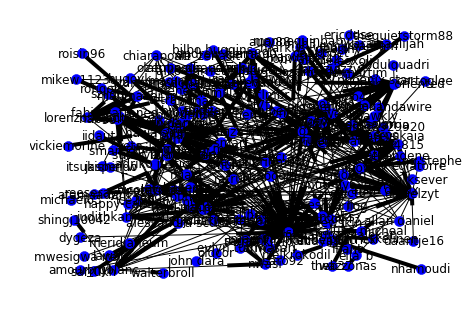

In [88]:
options = {
    "node_color": "blue",
    "node_size": 100,
    "width": 1
}

nx.draw_random(G, **options, with_labels = True)
plt.savefig("full_user_network.png")

/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands ad

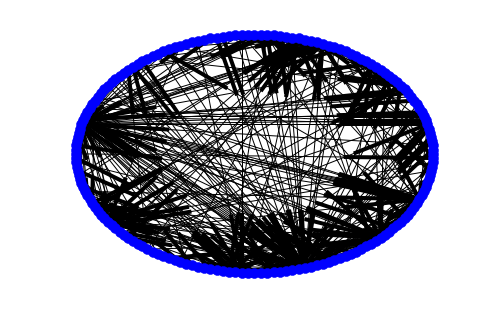

In [50]:
nx.draw_circular(G, **options)

/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands ad

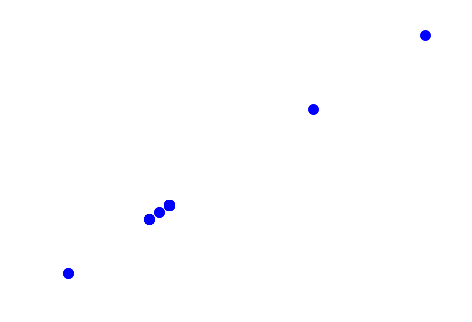

In [51]:
nx.draw_spectral(G, **options)

In [77]:
auth_a1_net = edges.loc[edges.auth_a == "--t7tr--", 
                       edges.columns[:2]]

In [83]:
auth_a1_nodes = (auth_a_net.auth_a.append(auth_a_net.auth_b)).unique()

In [84]:
auth_a1_nodes

array(['--t7tr--', 'danielzyt', 'hills95', 'kiggudde', 'livasa',
       'mugabi henry', 'nicoleyohe', 'tetram'], dtype=object)

In [85]:
sub_G = G.subgraph(auth_a1_nodes)

In [86]:
sub_G.edges()

[('--t7tr--', 'danielzyt'),
 ('--t7tr--', 'hills95'),
 ('danielzyt', 'nicoleyohe'),
 ('danielzyt', 'kiggudde'),
 ('danielzyt', 'hills95'),
 ('danielzyt', 'mugabi henry'),
 ('hills95', 'tetram'),
 ('hills95', 'kiggudde'),
 ('hills95', 'mugabi henry')]

/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/viviantai/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/Users/viviantai/ana

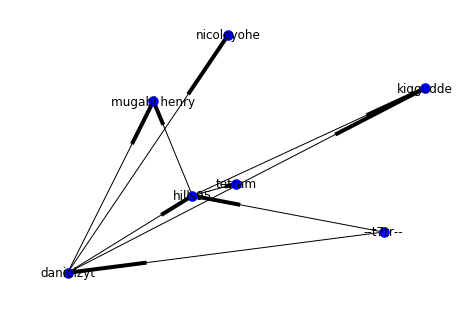

In [89]:
nx.draw_random(sub_G, **options, with_labels = True)
plt.savefig("subgraph_with_--t7tr--.png")